C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[32, 32, 33, ..., 92, 92, 92],
       [32, 32, 32, ..., 92, 92, 92],
       [32, 32, 33, ..., 91, 91, 91],
       ...,
       [21, 21, 20, ...,  8,  8,  8],
       [21, 21, 21, ...,  8,  8,  8],
       [21, 21, 21, ...,  8,  8,  8]], dtype=uint8)

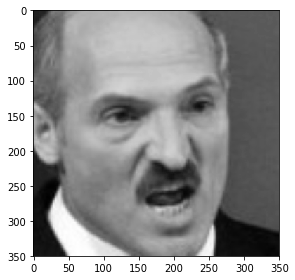

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.io import imread, imshow

%matplotlib inline
img = color.rgb2gray(imread('images/Alexander_Lukashenko_0001.jpg'))
imshow(img)
img

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


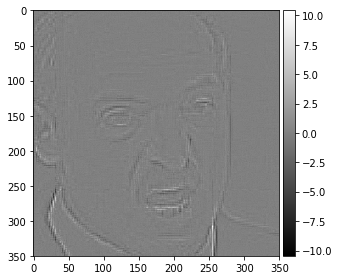

In [4]:
from scipy.ndimage.filters import convolve

# Edge detect
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
conv_img = convolve(img/20,kernel)
# conv_img = img
imshow(conv_img,cmap='gray')

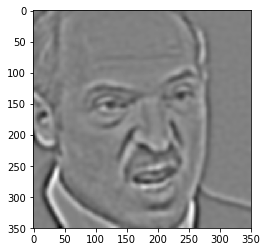

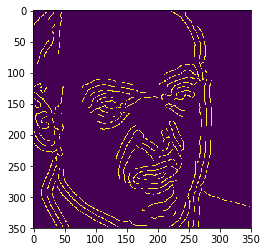

In [5]:
# Gaussian
from scipy import ndimage as ndi

gauss_conv_img = ndi.gaussian_filter(conv_img, 4)
plt.figure()
plt.imshow(gauss_conv_img, cmap='gray')

# Canny edge detect
from skimage import feature

edge = feature.canny(gauss_conv_img, sigma=1)
plt.figure()
plt.imshow(edge)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


(350, 350)

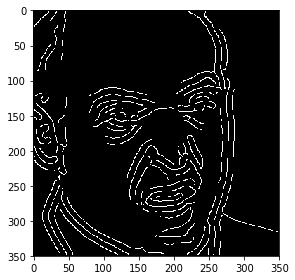

In [10]:
imshow(edge)
edge.shape

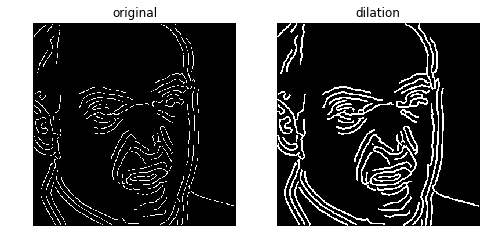

In [6]:
# Dilation
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

dila_edge = dilation(edge, disk(1))
plot_comparison(edge, dila_edge, 'dilation')

# dila_edge2 = dilation(edge, disk(2))
# plot_comparison(edge, dila_edge, 'dilation')

# ero_edge = erosion(dila_edge2, disk(1))
# plot_comparison(edge, ero_edge, 'erosion')

# np.array_equal(dila_edge, ero_edge)

[0.0893464  0.         0.82130675 ... 0.         0.         0.        ]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64

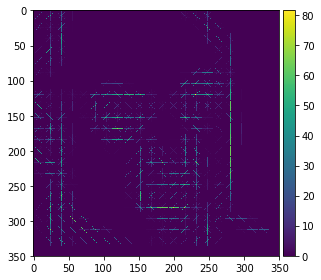

In [7]:
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imshow

# Convert binary to gray
dila_gray = dila_edge*255 

# HOG : Feature Data, HOG Vector image
fd, hog_image = hog(dila_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

print(fd)
imshow(hog_image)

In [8]:
%matplotlib inline
import numpy as np
from pylab import *

fd.shape
# index = []
# for i in range(len(fd)):
#     index.append(i)

# scatter(index, fd)
# scatter(hog_image[1], hog_image[0])

(3528,)